To predict biological characteristics ("phenotypes") from gene expression data.  

In this data, mice were characterized by three properties:
* Whether they had down's syndrome (trisomy) or not
* Whether they were stimulated to learn or not
* Whether they had a drug memantine or a saline control solution.

With these three choices, there are 8 possible classes for each mouse.  For each mouse, the expression levels were measured across 77 genes.  To predict genes are potentially involved in Down's syndrome and if drugs and learning have any noticeable effects.


## Load the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing

In [ ]:
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls", 
                   index_col = 0) 
df.head(5)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.6458

In [ ]:
df1 = df.fillna(df.mean())

## Binary Classification for Down's Syndrome

Predicting the binary class label in `df1['Genotype']` which indicates if the mouse has Down's syndrome or not.  

In [ ]:
y = np.unique(df1['Genotype'] , return_inverse= True)[1]
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
xnames = df1.columns.values[:-4]

X = np.array(df1[xnames])

X

array([[0.50364388, 0.74719322, 0.4301753 , ..., 0.13179003, 0.1281856 ,
        1.67565235],
       [0.51461708, 0.68906355, 0.41177034, ..., 0.13510297, 0.1311187 ,
        1.74360965],
       [0.50918309, 0.7302468 , 0.41830878, ..., 0.13336183, 0.12743108,
        1.92642659],
       ...,
       [0.22869955, 0.39517937, 0.23411809, ..., 0.22919311, 0.35521305,
        1.43082502],
       [0.22124241, 0.41289438, 0.24397413, ..., 0.25131651, 0.36535319,
        1.40403123],
       [0.30262572, 0.46105919, 0.25656431, ..., 0.25299481, 0.36527803,
        1.37099946]])

In [ ]:
from sklearn.model_selection import train_test_split

Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()
# Fit with training data
scaler.fit(Xtr)
# Transform train and test data
Xtr1 = scaler.transform(Xtr)
Xts1 = scaler.transform(Xts)

In [ ]:
logreg = linear_model.LogisticRegression(C=1e5, solver = 'liblinear')
logreg.fit(Xtr1, ytr)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yhat = logreg.predict(Xts1)
acc = np.mean(yhat == yts)
print("Accuracy on test data = %f" % acc)

Accuracy on test data = 0.947531


## Interpreting the weight vector

<StemContainer object of 3 artists>

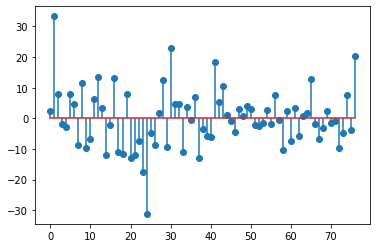

In [ ]:
W = logreg.coef_[0]
plt.stem(W, use_line_collection=True)

Names of the genes for two components `i` where the magnitude of `W[i]` is largest.  

In [ ]:
xnames[W.argsort()[-2:]]

array(['APP_N', 'ITSN1_N'], dtype=object)

## Cross Validation



In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)

acc = np.zeros(nfold)
prec = np.zeros(nfold)
rec = np.zeros(nfold)
f1 = np.zeros(nfold)

for i, I in enumerate(kf.split(X)):
    
    # Get training and test data
    train, test = I
    Xtr = X[train,:]
    ytr = y[train]
    Xts = X[test,:]
    yts = y[test]
    
    # Scale the data
    scaler = StandardScaler()
    Xtr1 = scaler.fit_transform(Xtr)
    Xts1 = scaler.transform(Xts)    
    
    # Fit a model    
    logreg.fit(Xtr1, ytr)
    
    # Predict on test samples and measure accuracy
    yhat = logreg.predict(Xts1)
    acc[i] = np.mean(yhat == yts)
    
    # Measure other performance metrics
    prec[i],rec[i],f1[i],_  = precision_recall_fscore_support(yts,yhat,average='binary') 
    

# Take average values of the metrics
precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
accm= np.mean(acc)

print('Precision = %f' %precm)
print('Recall = %f' %recm)
print('f1 = %f' %f1m)
print('Accuracy = %f' %accm)

Precision = 0.946117
Recall = 0.968677
f1 = 0.956682
Accuracy = 0.959259


## Multi-Class Classification

Now using the response variable in `df1['class']`.  This has 8 possible classes.  

In [ ]:
y = np.unique(df1['class'] , return_inverse= True)[1]
y

array([0, 0, 0, ..., 7, 7, 7])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

# TODO
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)

acc = np.zeros(nfold)
prec = np.zeros(nfold)
rec = np.zeros(nfold)
f1 = np.zeros(nfold)

C = np.zeros((8, 8))

for i, I in enumerate(kf.split(X)):
    
    # Get training and test data
    train, test = I
    Xtr = X[train,:]
    ytr = y[train]
    Xts = X[test,:]
    yts = y[test]
    
    # Scale the data
    scaler = StandardScaler()
    Xtr1 = scaler.fit_transform(Xtr)
    Xts1 = scaler.transform(Xts)    
    
    # Fit a model    
    logreg.fit(Xtr1, ytr)
    
    # Predict on test samples and measure accuracy
    yhat = logreg.predict(Xts1)
    acc[i] = np.mean(yhat == yts)
    
    # Confusion metrics
    C = C + confusion_matrix(yts,yhat)
    

# Take average values of the metrics
accm= np.mean(acc)

# normalize the rows of the confusion matrix so that they sum to one
C = C / C.sum(axis=1)

print('Accuracy = %f' %accm)

print(np.array_str(C, precision=4, suppress_small=True))

Accuracy = 0.987963
[[0.98   0.0074 0.     0.     0.     0.0095 0.     0.0074]
 [0.02   0.9704 0.     0.     0.0074 0.     0.     0.    ]
 [0.     0.0074 0.9867 0.     0.0074 0.     0.     0.    ]
 [0.0133 0.     0.     0.9852 0.     0.     0.     0.    ]
 [0.     0.0074 0.     0.     0.9926 0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.     0.    ]
 [0.     0.     0.     0.0074 0.     0.     0.9926 0.    ]
 [0.     0.     0.     0.     0.     0.     0.     1.    ]]


Re-running the logistic regression on the entire training data and get the weight coefficients.  

In [ ]:
# Scale the data
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

# Fit a model    
logreg.fit(X, y)
W = logreg.coef_
W.shape

(8, 77)

<StemContainer object of 3 artists>

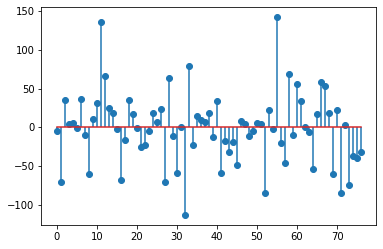

In [ ]:
plt.stem(W[0,:], use_line_collection=True)

## L1-Regularization

In most genetic problems, only a limited number of the tested genes are likely influence any particular attribute.  Hence, the weight coefficients in the logistic regression model should be sparse.  Genetic analysis commonly imposes sparsity by adding an l1-penalty term. 

In [ ]:
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)

C = np.logspace(-1,2,20)
acc = np.zeros((20,nfold))

for row, c in enumerate(C):

  for col, I in enumerate(kf.split(X)):

    # Get training and test data
    train, test = I
    Xtr = X[train,:]
    ytr = y[train]
    Xts = X[test,:]
    yts = y[test]

    # Scale the data
    scaler = StandardScaler()
    Xtr1 = scaler.fit_transform(Xtr)
    Xts1 = scaler.transform(Xts)    

    logreg2 = linear_model.LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')

    # Fit a model    
    logreg2.fit(Xtr1, ytr)

    # Predict on test samples and measure accuracy
    yhat = logreg2.predict(Xts1)
    acc[row, col] = np.mean(yhat == yts)

# Take average of accuracy over each row
accm = np.mean(acc, axis=1)

print(accm)
print("-------")
print("Range of C between -1 to 2 provides the best results from all the values I tried")

[0.94537037 0.96018519 0.97407407 0.98055556 0.98425926 0.99074074
 0.98888889 0.98796296 0.99074074 0.99166667 0.99166667 0.99166667
 0.99259259 0.99074074 0.98981481 0.99166667 0.99351852 0.99166667
 0.99259259 0.98888889]
-------
Range of C between -1 to 2 provides the best results from all the values I tried


As seen, weight coeff for less significant features have been reduced and are closer to zero


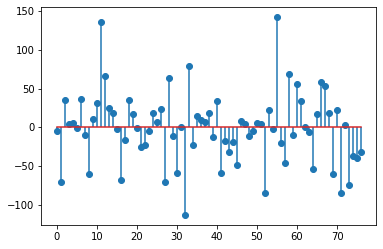

In [ ]:
# Scale the data
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

# Fit a model    
logreg2 = linear_model.LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
logreg2.fit(X1, y)
W = logreg.coef_

plt.stem(W[0,:], use_line_collection=True)

print("As seen, weight coeff for less significant features have been reduced and are closer to zero")

In [ ]:
# Average of all the accuracies 
avg_acc = np.mean(accm)
print(avg_acc)
print("-------")
print("Accuracy achieved with regularization is similar to that achieved without L1.") 
print("But this is because I have used Standard Scaler earlier, had that not been used, the result would be significantly greater")

0.985462962962963
-------
Accuracy achieved with regularization is similar to that achieved without L1.
But this is because I have used Standard Scaler earlier, had that not been used, the result would be significantly greater
